In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

#<font size="20+"> <font color="blue"> **Plotnine: data + geom -> graph**</font>

En esta clase estudiaremos la biblioteca gráfica ``plotnine`` implementada por Hassan Kibirige.

**¿Qué es plotnine?**

``Plotnine`` es una implementación de una gramática de gráficos en Python que se basa en ``ggplot2`` (de R).

**¿Qué es ggplot?**
  1. Un paquete creado por Hadley Wickham para la visualización de datos en R
  2. Este paquete utiliza una **gramática de gráficos**, que fue desarrollada por Leland Wilkinson.
  3. ggplot nos entrega un conjunto de componentes que al ser combinadas producen gráficos personalizados.

**Galería con algunos gráficos en ggplot:** https://plotnine.readthedocs.io/en/stable/gallery.html



#<font color="teal">**Datos mpg**</font>
Empezamos cargando los datos que ocuparemos.


  Número |Nombre  | Descripción 
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      |Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    |Number of carburetors


In [ ]:
#Importamos statsmodels.api para importar algunos set de datos
import statsmodels.api as sm

In [ ]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# <font color="teal">**Nuestro primer ejemplo en ggplot**

En este ejemplo veremos que **los gráficos en ggplot se construyen en capas**.

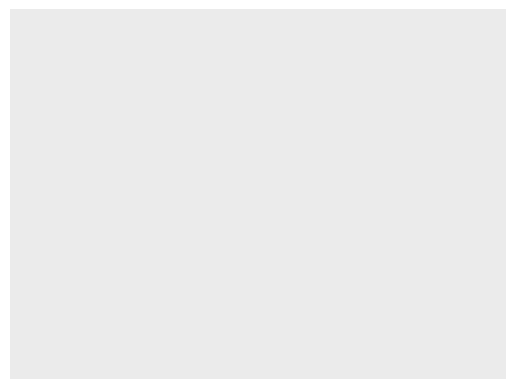

<ggplot: (8733623470217)>

In [ ]:
(ggplot(df))  #Empezamos abriendo el canvas. Usamos el método ggplot("dataframe") que recibe un objeto dataframe

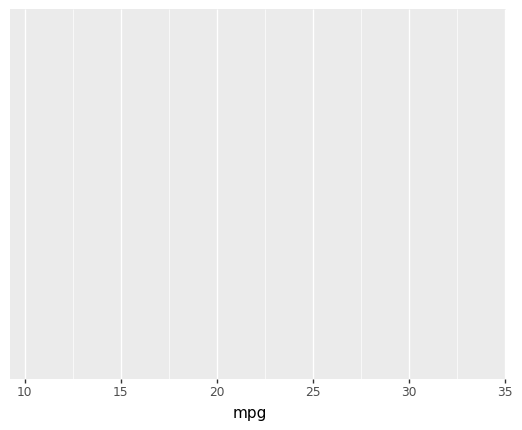

<ggplot: (8733623219805)>

In [ ]:
#Ahora añadimos un eje x. 
#Esto lo hacemos indicando en el comando aes() que el eje x va estar asociado a la variable "mpg" en nuestro dataframe.
(
ggplot(df)+
 aes(x="mpg")
)

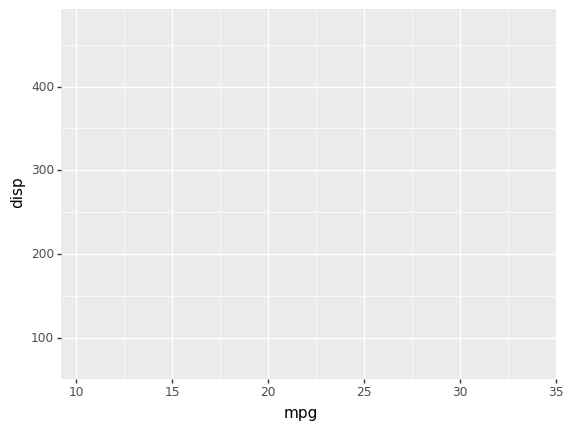

<ggplot: (8733621449781)>

In [ ]:
#Añadimos el eje y usando nuevamente aes()
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")
)

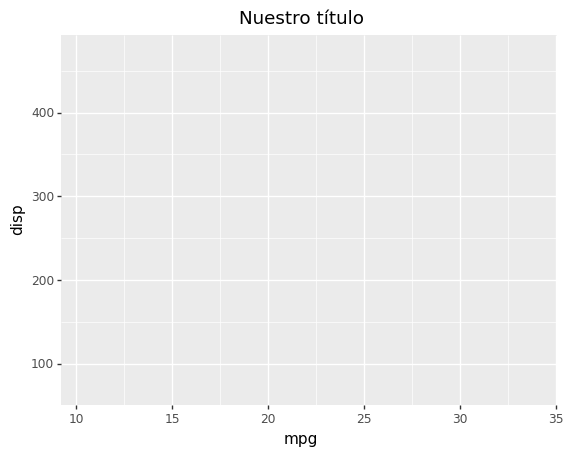

<ggplot: (8733623560761)>

In [ ]:
#Podemos agregar un título con el comando ggtitle()
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")+
 ggtitle("Nuestro título")
)

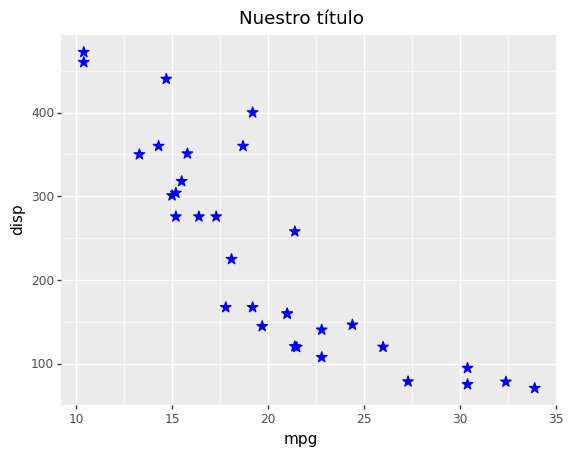

<ggplot: (8733623605413)>

In [ ]:
#Utilizando el comando geom_poin() le indicamos a ggplot que queremos un gráfico de puntos para x e y definidos en aes()
#size = elige el tamaño de nuestros puntos
#shape = elige la forma de nuestros puntos 
#color = elige el color de nuestros puntos
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")+
 ggtitle("Nuestro título")+
 geom_point(size=4,shape="*",color="blue")
)

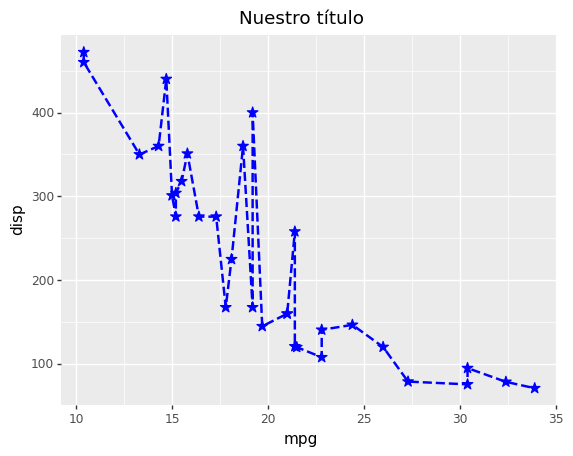

<ggplot: (8733621414257)>

In [ ]:
#Si además queremos agregar una linea que una todos nuestros puntos, utilizamos el comando geom_line() (note que lo agregamos a lo anterior con el comando +)
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")+
 ggtitle("Nuestro título")+
 geom_point(size=4,shape="*",color="blue")+
 geom_line(size=1,linetype="dashed",color="blue")  #geom_line puede ser personalizado: size, linetype y color
)

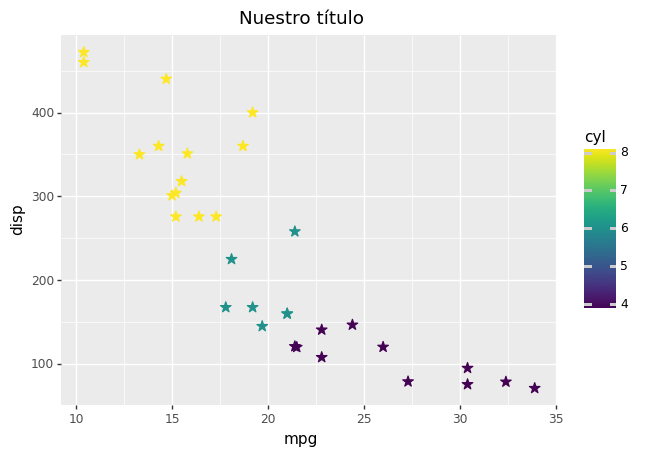

<ggplot: (8733623517125)>

In [ ]:
#Si queremos pintar nuestros puntos de acuerdo a una tercera variable en nuestra base de datos, usamos aes(color="Tercera variable")
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")+
 ggtitle("Nuestro título")+
 geom_point(size=4,shape="*")+
 aes(color="cyl")
)

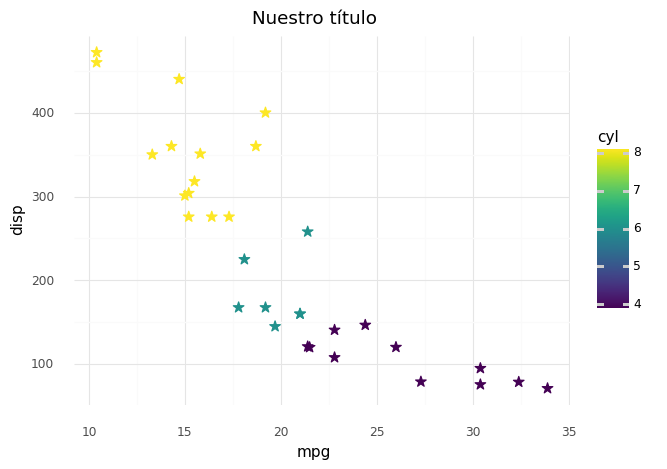

<ggplot: (8733623509933)>

In [ ]:
#Además podemos personalizar nuestro fondo utilizando el comando themes_"opción"()
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")+
 ggtitle("Nuestro título")+
 geom_point(size=4,shape="*")+
 aes(color="cyl")+
 theme_minimal()
)

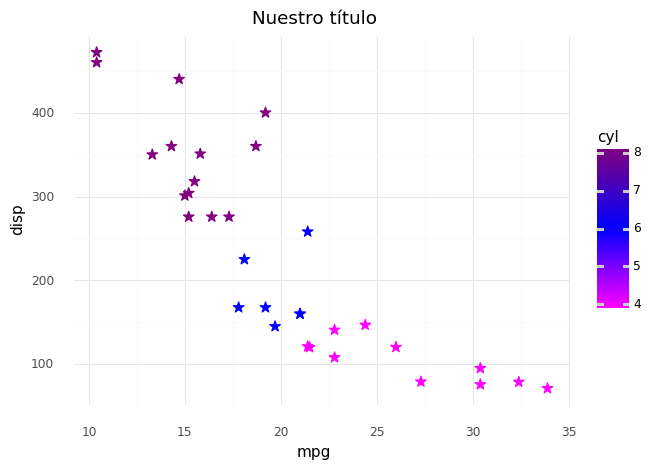

<ggplot: (8733623183097)>

In [ ]:
#Si no nos gustan los colores que eligio ggplot, los podemos cambiar usando scale_color_gradient2
(
ggplot(df)+
 aes(x="mpg")+
 aes(y="disp")+
 ggtitle("Nuestro título")+
 geom_point(size=4,shape="*")+
 aes(color="cyl")+
 theme_minimal()+
 scale_color_gradient2(low="magenta",mid="blue",high="purple",midpoint=6)
)

# <font color="teal">**Componentes de un gráfico ggplot** </font>

Todo gráfico en ggplot se construye como una combinación de bloques de construcción que funcionan de forma independiente. Estos bloques estan asociados a los siguientes atributos:

1. **data**: un data frame que se entrega en la declaración del gráfico ``ggplot(data)``
2. **aes**thetic: hace mapeo de las variables del dataframe a propiedades visuales: size, color, x (eje x), y (eje y).
3. **geom**etric: objetos geométricos, puntos lineas, barras, etc 
4. **coord**inate system: sistema de coordenadas.
5. **scale**s: nos permitira ajustar los valores de la leyenda, axis, colores, etc.
6. **theme**: se encarga de cambiar el aspecto de un gráfico.

Existen otros bloques de construcción, pero los aprenderémos a medida que construyamos gráficos.

**Para más información sobre todas las opciones de ggplot en plotnine ir a este sitio web:**   https://plotnine.readthedocs.io/en/stable/api.html

## **Ejercicio**

En este ejercicio  replicaremos el gráfico que se muestra abajo. Para poder hacer esto, iremos identificando una a una cada una de las capas que se necesitan para reconstruir este gráfico.

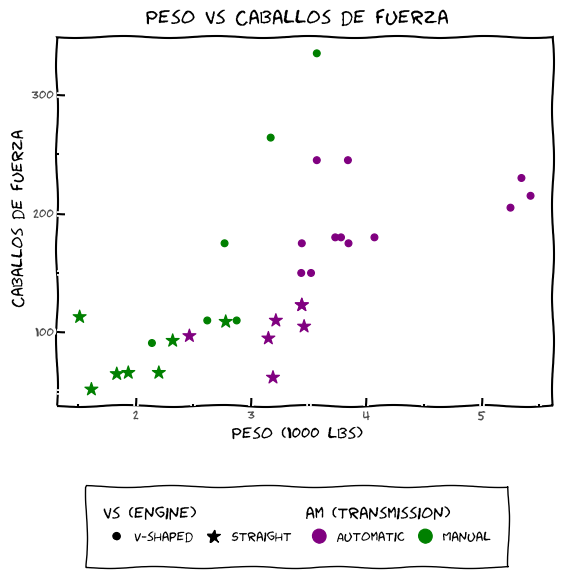

### **Primera capa**
La primera capa, y la más importante, es la capa que conecta un dataframe con ggplot. Esta conección se hace pasandole al elemento ``ggplot()`` el data frame que vamos a usar (en este caso df).

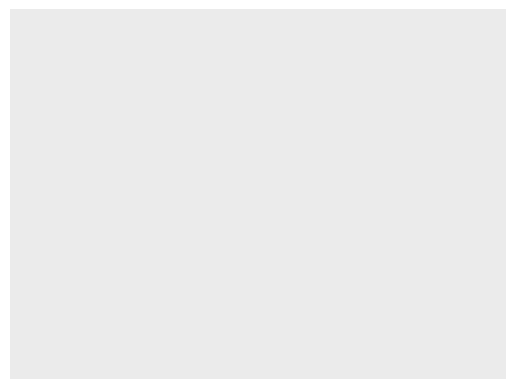

<ggplot: (8733621436185)>

In [ ]:
(ggplot(df)) #Ahora nuestro gráfico esta conectado con los datos del dataframe df

### **Segunda capa**

Notamos 3 cosas en el gráfico objetivo:
1. Estamos graficando el **peso (wt) vs los caballos de fuerza (hp)**.
2. Asignamos una **forma** distinta a los punto que graficamos según el tipo de motor **(vs)** 
3. Asignamos un **color** diferente a cada punto de acuerdo al tipo de transmisión del auto **(am)**.

La segunda capa entonces, va tener la importante labor de indicarle a ggplot las variables del dataframe que queremos que aparezcan en nuestro gráfico. Esto se hace utilizando la función aesthetics:

**aes(x="wt",y="hp",shape="vs",color="am")**

Esta función tiene la importante labor de decirle a ggplot cuales son las variables que se van a graficar, además de asignarle su "posición en el gráfico". Por ejemplo:

*  **x="wt":** indica que la variable "wt" está conectada con el eje x.
*  **color="am":**  indica que am está asociada al color.


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


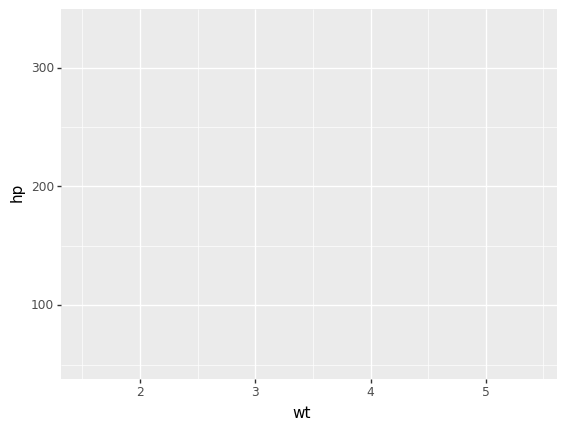

<ggplot: (8733621336189)>

In [ ]:
(ggplot(df)
+aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")
) 

### **Tercera capa**

Ahora estamos casí listos para graficar, tenemos
1. Cargados los datos
2. Lista la asignación de variables que queremos graficar

El **tercer paso**  es indicarle a ggplot el **elemento geométrico** o **tipo de gráfico** que vamos a utilizar para graficar. Esto se hace utilizando el comando:

**geom_"opción"()**

Tenemos varias opciones. Por ejemplo ``geom_point()``, ``geom_line()``, ``geom_bar()``, ``geom_smooth()``, etc... 

**En las siguientes clases vamos aprender algunas de estas opciones. 

**En este caso como el gráfico objetivo es un gráfico de puntos, usaremos ``geom_point``

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


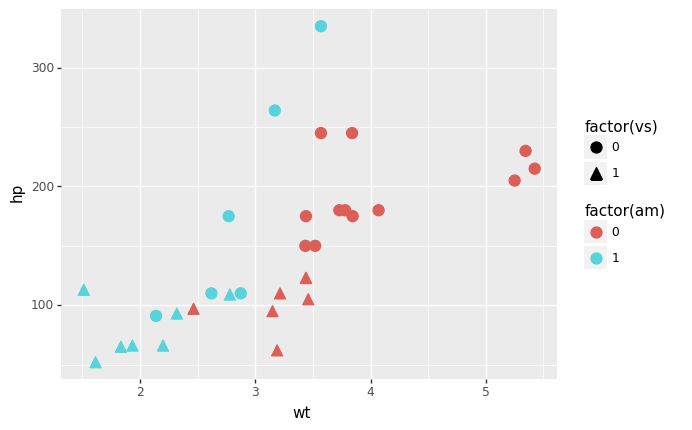

<ggplot: (8733623360621)>

In [ ]:
(ggplot(df)
+aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")
+geom_point(size=4) #podemos usar el atributo size para aumentar el tamaño de nuestros puntos
) 

### **Cuarta capa**

Nuestro gráfico ya se esta viendo similar al gráfico objetivo. Sin embargo una de las diferencias más notorias es el color del canvas y el tipo de letra. Estas opciones se pueden controlar usando el comando 

**theme_"opción"()**

Esxisten varios themes: ``them_classic()``, ``theme_minimal()``, ``theme_xkcd()``, etc, que iremos aprendiendo a medida que vayamos graficando.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


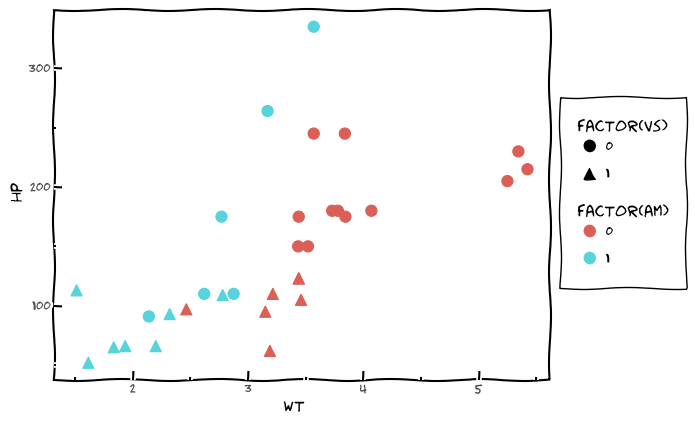

<ggplot: (8733623254733)>

In [ ]:
(ggplot(df)
+aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")
+geom_point(size=4)+
theme_xkcd()
) 

### **Quinta capa** 

En la quinta capa modificaremos las opciones referentes a las formas geométricas que usamos para graficar los puntos, y a los colores. Utilizaremos colores personalizados. Para esto usamos el atributo 

**scale_"opcion1"_"opcion2"()**

* **"opcion1"=** indica a que nos referimos. Por ejemplo shape, color, etc
* **"opction2"=** nos indica la forma en que vamos a modificar un objeto. Ahora aprenderemos la opción manual.

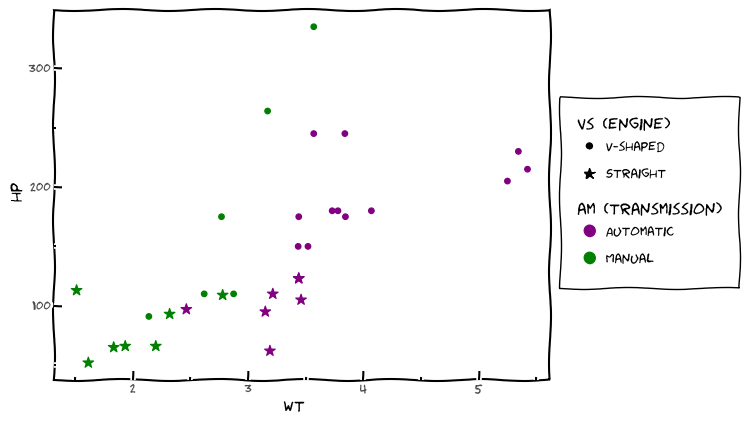

<ggplot: (8733623157321)>

In [ ]:
(ggplot(df)
+aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")
+geom_point(size=4)+
theme_xkcd()+
scale_shape_manual(name="vs (engine)",values=[".","*"],breaks=[0,1],labels=["V-shaped","Straight"])+
scale_color_manual(name="am (transmission)",values=["purple","green"],breaks=[0,1],labels=["Automatic","Manual"])
) 

### **Sexta capa**

En esta capa editaremos el título y los nombres de los ejes x e y. Para esto utilizamos:

1. **ggtitle("Mi título")**
2. **xlab("Nombre eje x")**
3.**ylab("Nombre eje y")**

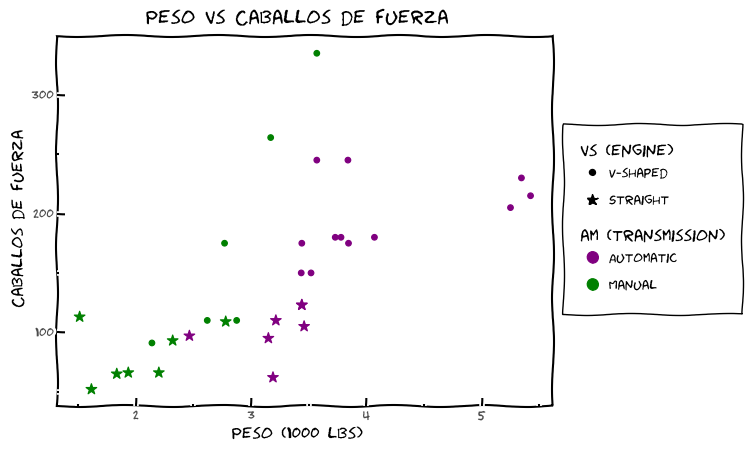

<ggplot: (8733621347857)>

In [ ]:
(   
ggplot(df)+
aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")+
geom_point(size=4)+
theme_xkcd()+
scale_shape_manual(name="vs (engine)",values=[".","*"],breaks=[0,1],labels=["V-shaped","Straight"])+
scale_color_manual(name="am (transmission)",values=["purple","green"],breaks=[0,1],labels=["Automatic","Manual"])+
ggtitle("Peso vs Caballos de fuerza")+
xlab("Peso (1000 lbs)")+
ylab("Caballos de fuerza")
)

### **Más capas (no necesariamente la última)**

Por ultimo cambiamos la posición y forma de nuestra leyenda. Esto se puede hacer usando las opciones de **theme()** como lo mostramos abajo.

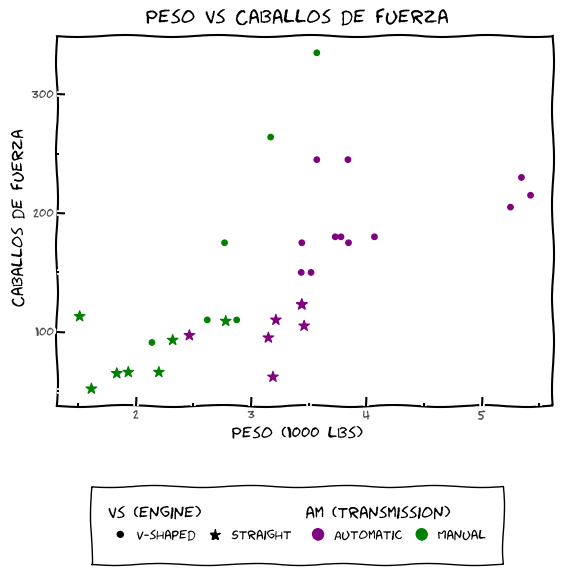

<ggplot: (8733623464965)>

In [ ]:
#Construiremos un gráfico para analizar los caballos de fuerza hp en término de el peso del automovil wt
(
ggplot(df)+
aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")+
geom_point(size=4)+
theme_xkcd()+
scale_shape_manual(name="vs (engine)",values=[".","*"],breaks=[0,1],labels=["V-shaped","Straight"])+
scale_color_manual(name="am (transmission)",values=["purple","green"],breaks=[0,1],labels=["Automatic","Manual"])+
ggtitle("Peso vs Caballos de fuerza")+
xlab("Peso (1000 lbs)")+
ylab("Caballos de fuerza")+
theme(legend_position="bottom",legend_box_spacing=0.8,legend_box="horizontal")
)